In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df= pd.read_csv('Data/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 💡 Feature Descriptions for Heart Disease Dataset

This section explains each feature (column) in the dataset and how it may relate to the risk of heart disease (`target`).

---

### 🧑‍ Age (`age`)
- **Definition**: Age of the patient (in years).
- **Typical Range**: 29 – 77
- **Interpretation**:
  - 🔵 **Lower risk**: Ages below 45
  - 🔴 **Higher risk**: Ages above 50
- **Relation to Target**: Risk of heart disease increases with age.

---

### ⚥ Sex (`sex`)
- **Definition**: Biological sex of the patient.
- **Values**:
  - `0` = Female
  - `1` = Male
- **Interpretation**:
  - 🔴 **Males** tend to have a higher risk.
- **Relation to Target**: Males generally show a slightly higher incidence of heart disease.

---

### 💔 Chest Pain Type (`cp`)
- **Definition**: Type of chest pain experienced.
- **Values**:
  - `0`: Typical angina
  - `1`: Atypical angina
  - `2`: Non-anginal pain
  - `3`: Asymptomatic (no pain but has heart issues)
- **Interpretation**:
  - 🔵 `1`, `2` = Lower risk
  - 🔴 `3` = Strong indicator of heart disease
- **Relation to Target**: Asymptomatic (`3`) chest pain type is highly associated with heart disease.

---

### 💓 Resting Blood Pressure (`trestbps`)
- **Definition**: Resting blood pressure (in mm Hg).
- **Typical Range**: 90 – 200
- **Interpretation**:
  - 🔵 90 – 120 mm Hg = Normal
  - 🟠 120 – 139 mm Hg = Pre-high
  - 🔴 140+ mm Hg = Hypertension
- **Relation to Target**: High blood pressure is a strong risk factor.

---

### 🧬 Serum Cholesterol (`chol`)
- **Definition**: Serum cholesterol in mg/dl.
- **Typical Range**: 125 – 564
- **Interpretation**:
  - 🔵 Below 200 = Desirable
  - 🟠 200–239 = Borderline high
  - 🔴 240+ = High risk
- **Relation to Target**: High cholesterol increases heart disease risk.

---

### 🍬 Fasting Blood Sugar (`fbs`)
- **Definition**: Is fasting blood sugar > 120 mg/dl?
- **Values**:
  - `1` = Yes (high)
  - `0` = No (normal)
- **Interpretation**:
  - 🔴 High fasting sugar (`1`) is associated with diabetes → increases heart risk.
- **Relation to Target**: Elevated fasting blood sugar suggests a higher risk.

---

### 🧠 Resting ECG (`restecg`)
- **Definition**: Resting electrocardiographic results.
- **Values**:
  - `0`: Normal
  - `1`: ST-T wave abnormality
  - `2`: Left ventricular hypertrophy (LVH)
- **Interpretation**:
  - 🔴 LVH or abnormalities (`1`, `2`) suggest heart stress.
- **Relation to Target**: Abnormal ECG results indicate heart problems.

---

### 🏃‍♂️ Max Heart Rate Achieved (`thalach`)
- **Definition**: Maximum heart rate achieved during stress test.
- **Typical Range**: 70 – 210
- **Interpretation**:
  - 🔵 140–170 bpm = Good exercise response
  - 🔴 Very low max rate = Possible blocked arteries
- **Relation to Target**: Lower `thalach` often found in patients with heart disease.

---

### ❌ Exercise-Induced Angina (`exang`)
- **Definition**: Chest pain during exercise?
- **Values**:
  - `1` = Yes (angina present)
  - `0` = No
- **Interpretation**:
  - 🔴 `1` = Indicates heart is stressed under load
- **Relation to Target**: Strongly related to presence of heart disease.

---

### 📉 ST Depression (`oldpeak`)
- **Definition**: ST depression induced by exercise relative to rest.
- **Typical Range**: 0 – 6.2
- **Interpretation**:
  - 🔵 0.0 – 1.0 = Normal
  - 🔴 >2.0 = Risk of ischemia (lack of oxygen)
- **Relation to Target**: Higher `oldpeak` is linked to heart disease.

---

### 📐 Slope of Peak Exercise ST Segment (`slope`)
- **Definition**: The slope of the ST segment during peak exercise.
- **Values**:
  - `0`: Upsloping (good)
  - `1`: Flat (moderate concern)
  - `2`: Downsloping (high risk)
- **Interpretation**:
  - 🔴 Downsloping = Poor heart response to exercise
- **Relation to Target**: `2` (downsloping) often found in heart disease cases.

---

### 🔢 Number of Major Vessels Colored by Fluoroscopy (`ca`)
- **Definition**: Number of major vessels (0–3) showing blood flow.
- **Typical Range**: 0 – 4
- **Interpretation**:
  - 🔵 0 = Normal
  - 🔴 1–3 = Blockage or narrowing
- **Relation to Target**: More vessels involved = Higher risk

---

### 🧪 Thalassemia (`thal`)
- **Definition**: Blood disorder related to oxygen levels.
- **Values**:
  - `1`: Normal
  - `2`: Fixed defect (old blockage)
  - `3`: Reversible defect (new blockage)
- **Interpretation**:
  - 🔴 Fixed or reversible defects = Poor heart oxygenation
- **Relation to Target**: High association with heart disease when `thal` is `2` or `3`

---

### 🎯 Target (`target`)
- **Definition**: Presence of heart disease
- **Values**:
  - `0`: No heart disease
  - `1`: Has heart disease
- **Goal**: Predict this value using the above features.


<Axes: xlabel='oldpeak'>

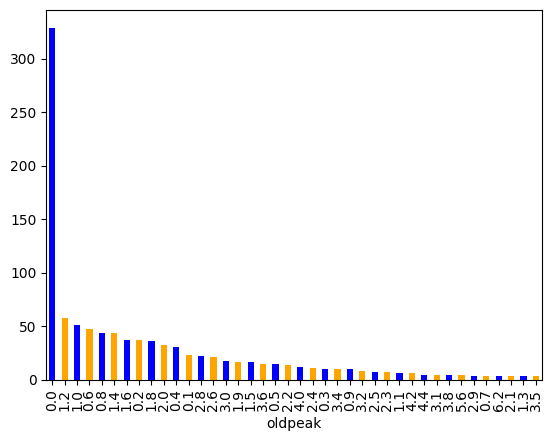

In [7]:
df["oldpeak"].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [10]:
df["cp"].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: xlabel='target'>

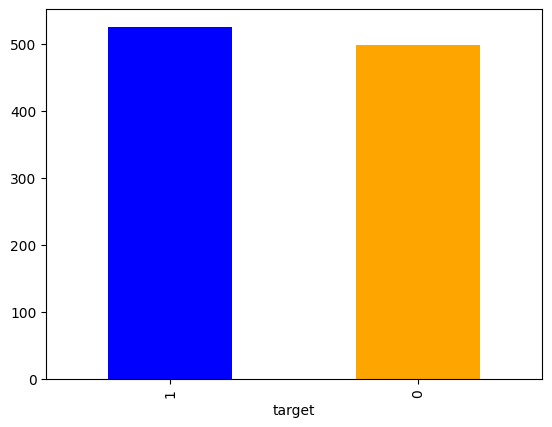

In [12]:
df["target"].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


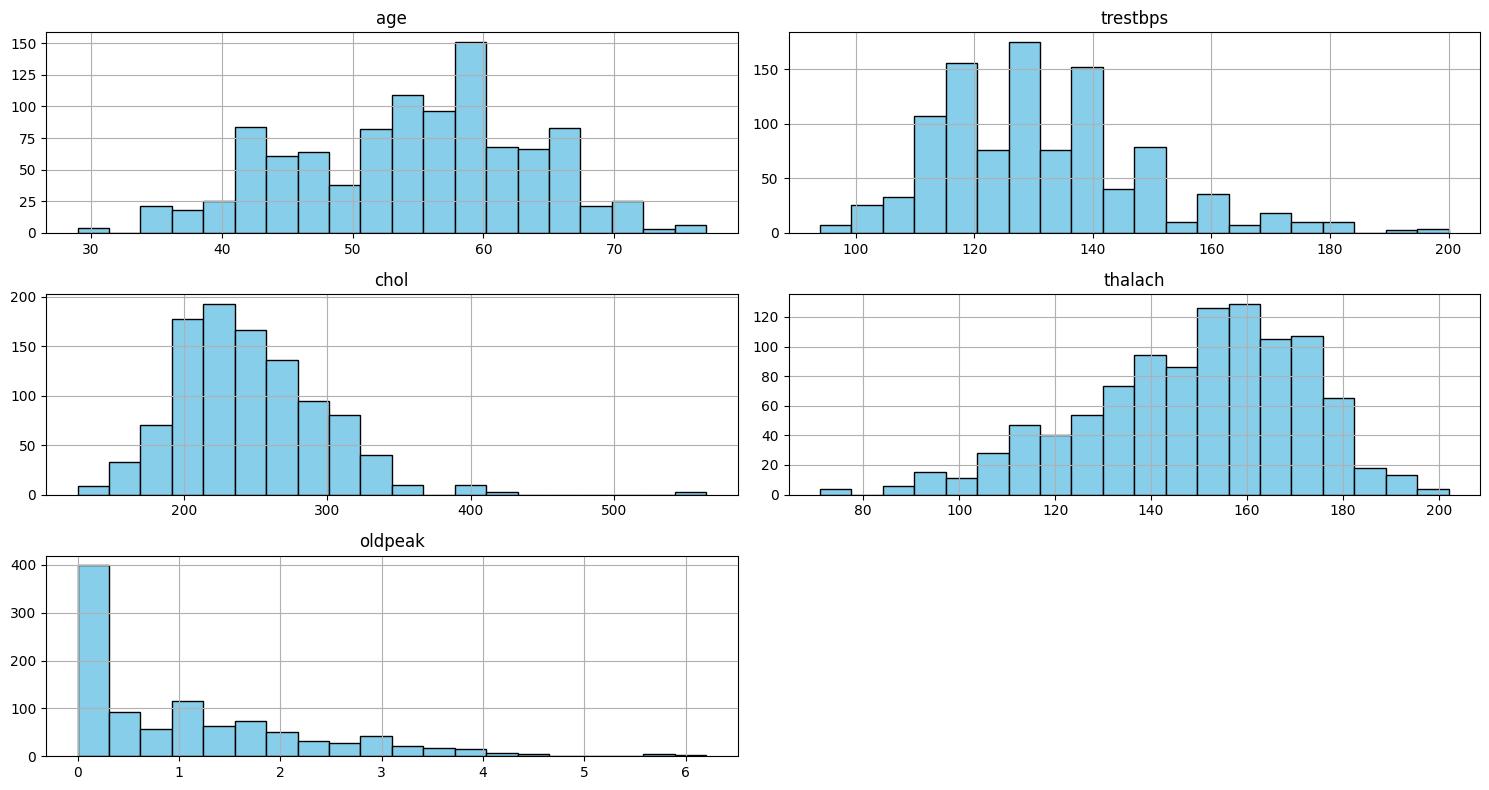

In [14]:
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continuous_vars].hist(bins=20, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

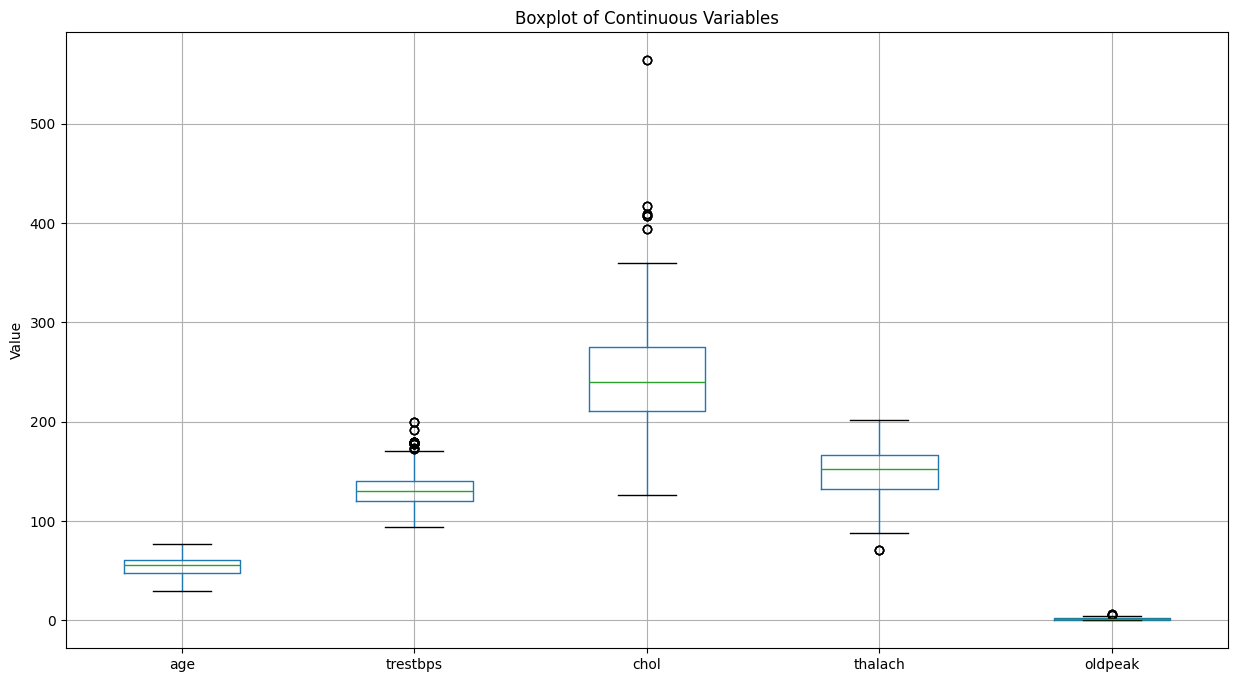

In [15]:
plt.figure(figsize=(15, 8))
df[continuous_vars].boxplot()
plt.title('Boxplot of Continuous Variables')
plt.ylabel('Value')
plt.show()

## 🚨 Outlier Insights

1. **Cholesterol** stands out with the highest number of outliers among all features.
2. **Resting blood pressure** shows a few significant high outliers.
3. **Maximum heart rate achieved** has some low outlier values, but they are not as prominent.
4. **Oldpeak** also exhibits several high outliers.

> These outliers may indicate unique patient profiles or potential data entry errors. Further investigation is recommended!